In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('C:/Users/sandi/Downloads/archive (12)/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
data.duplicated().sum()

0

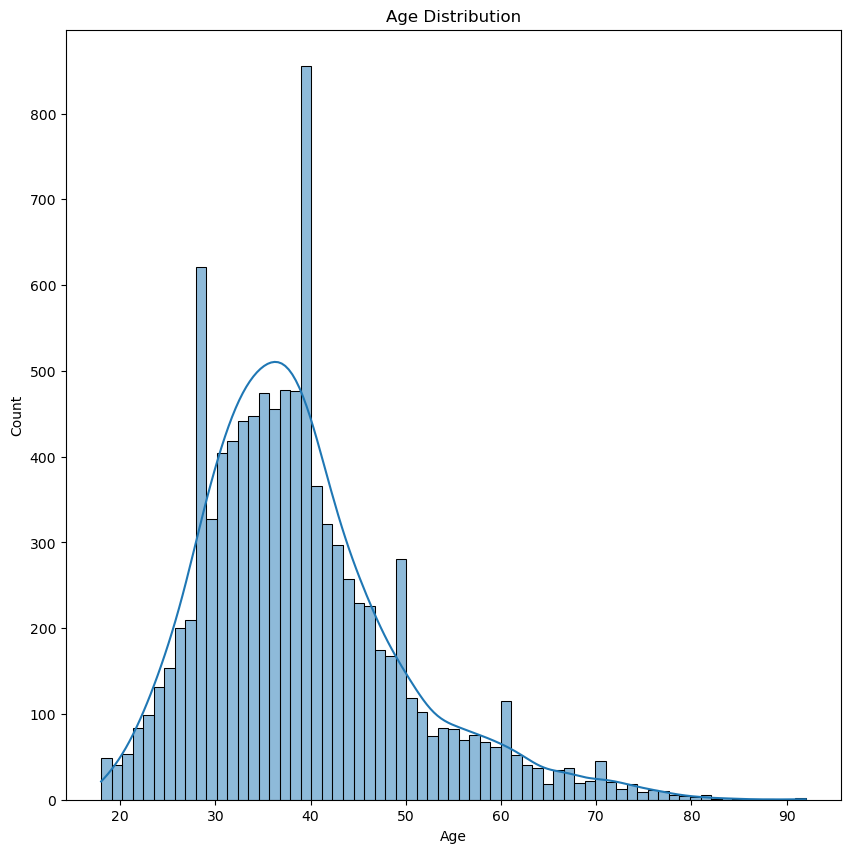

In [6]:
plt.figure(figsize=(10,10))
sns.histplot(data=data,x='Age',kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [7]:
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

In [8]:
new_geo=LabelEncoder()
data["new_geo"]=new_geo.fit_transform(data['Geography'])
data.drop('Geography',axis=1,inplace=True)

In [9]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_geo
0,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,2
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,2


In [10]:
#Feature Engineering
data['Balance_Salary_Ratio'] = data['Balance'] / data['EstimatedSalary']
data.drop(['Balance', 'EstimatedSalary'], axis=1, inplace=True)

In [11]:
x=data.drop('Exited',axis=1)
y=data['Exited']
x

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,new_geo,Balance_Salary_Ratio
0,619,1,42,2,1,1,1,0,0.000000
1,608,1,41,1,1,0,1,2,0.744677
2,502,1,42,8,3,1,0,0,1.401375
3,699,1,39,1,2,0,0,0,0.000000
4,850,1,43,2,1,1,1,2,1.587055
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,2,1,0,0,0.000000
9996,516,0,35,10,1,1,1,0,0.564108
9997,709,1,36,7,1,0,1,0,0.000000
9998,772,0,42,3,2,1,0,1,0.808230


In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
#Model Selection
#Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.8084
[[1935   56]
 [ 423   86]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.61      0.17      0.26       509

    accuracy                           0.81      2500
   macro avg       0.71      0.57      0.58      2500
weighted avg       0.78      0.81      0.76      2500



C:\Users\sandi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8584
[[1894   97]
 [ 257  252]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1991
           1       0.72      0.50      0.59       509

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [17]:
#Gradient Boosting 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Accuracy: 0.8648
[[1905   86]
 [ 252  257]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.75      0.50      0.60       509

    accuracy                           0.86      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.86      0.85      2500



In [18]:
#Model Evaluation
from sklearn.metrics import roc_auc_score

print(f"Logistic Regression AUC: {roc_auc_score(y_test, y_pred_lr)}")
print(f"Random Forest AUC: {roc_auc_score(y_test, y_pred_rf)}")
print(f"Gradient Boosting AUC: {roc_auc_score(y_test, y_pred_gb)}")


Logistic Regression AUC: 0.5704160865347897
Random Forest AUC: 0.7231845860399302
Gradient Boosting AUC: 0.7308586083347559
